## <font size=5> <strong>Heart Disease Prediction Using Machine Learning


**I. Importing essential libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


**II. Importing and understanding our dataset**

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

***Printing out a few columns***

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1


***Description***

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


***Let's understand our columns better:***

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


***Analysing the 'target' variable***

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0])

***Checking correlation between columns***

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


**III. Exploratory Data Analysis (EDA)**

***First, analysing the target variable:***

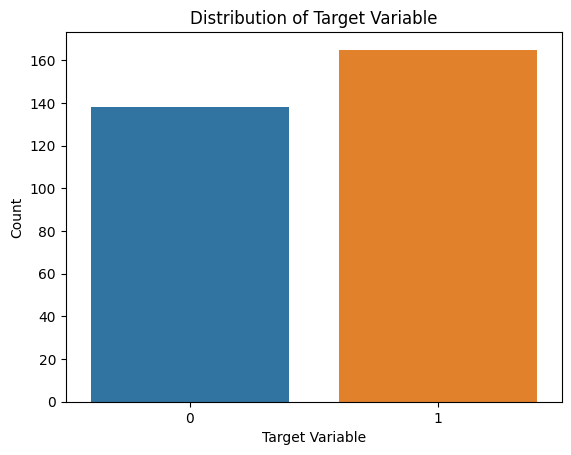

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your target variable is named "target" in the dataset
sns.countplot(data=dataset, x="target")

# Optionally, you can set labels for better clarity
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()


In [14]:
target_temp = dataset.target.value_counts()
print(target_temp)

1    165
0    138
Name: target, dtype: int64


In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


***We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features***

***Analysing the 'Sex' feature***

In [16]:
dataset["sex"].unique()

array([1, 0])

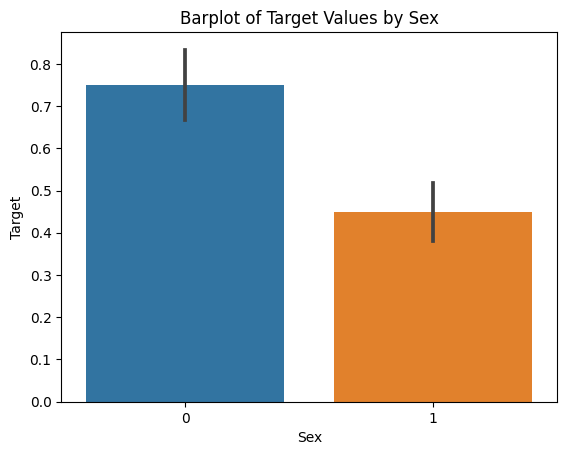

In [17]:
sns.barplot(data=dataset, x="sex", y="target")
plt.xlabel("Sex")
plt.ylabel("Target")
plt.title("Barplot of Target Values by Sex")
plt.show()

***Analysing the 'Chest Pain Type' feature***

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0])

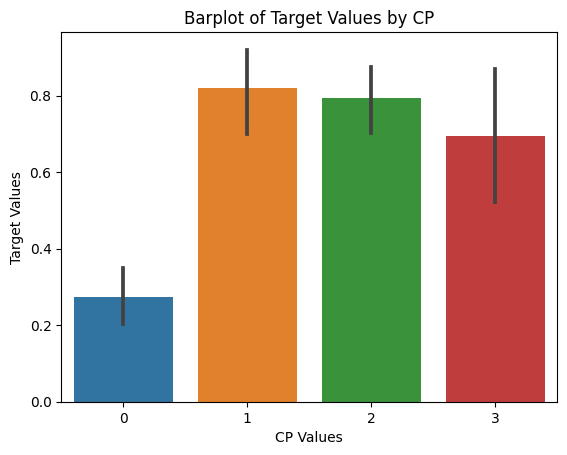

In [19]:
sns.barplot(data=dataset,x="cp", y='target')
plt.xlabel("CP Values")
plt.ylabel("Target Values")
plt.title("Barplot of Target Values by CP")
plt.show()

***Analysing the FBS feature***

In [20]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0])

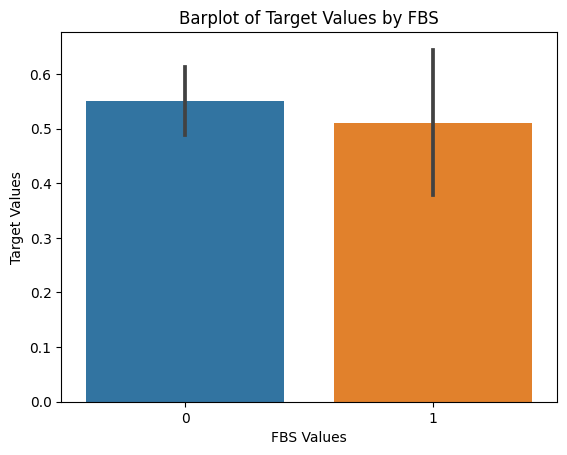

In [22]:
sns.barplot(data=dataset,x="fbs",y="target")
plt.xlabel("FBS Values")
plt.ylabel("Target Values")
plt.title("Barplot of Target Values by FBS")
plt.show()

***Analysing the restecg feature***

In [23]:
dataset["restecg"].unique()

array([0, 1, 2])

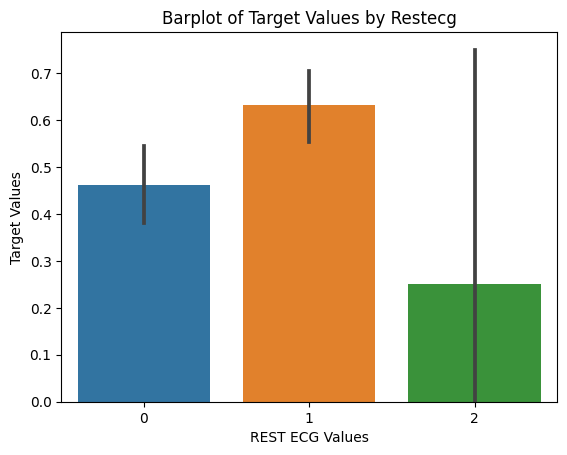

In [24]:
sns.barplot(data=dataset,x="restecg",y="target")
plt.xlabel("REST ECG Values")
plt.ylabel("Target Values")
plt.title("Barplot of Target Values by Restecg")
plt.show()

***Analysing the 'exang' feature***

In [25]:
dataset["exang"].unique()

array([0, 1])

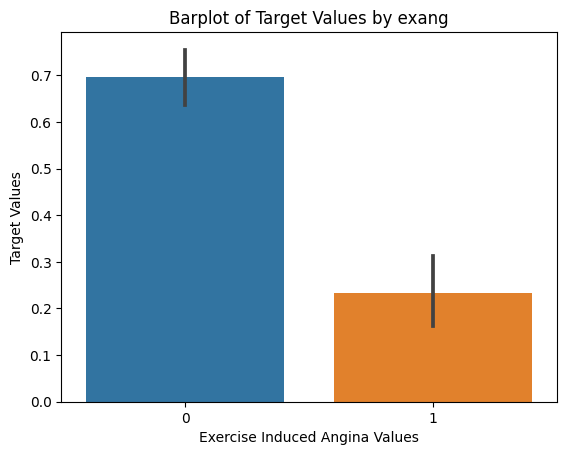

In [26]:
sns.barplot(data = dataset,x="exang",y="target")
plt.xlabel("Exercise Induced Angina Values")
plt.ylabel("Target Values")
plt.title("Barplot of Target Values by exang")
plt.show()

***Analysing the Slope feature***

In [27]:
dataset["slope"].unique()

array([0, 2, 1])

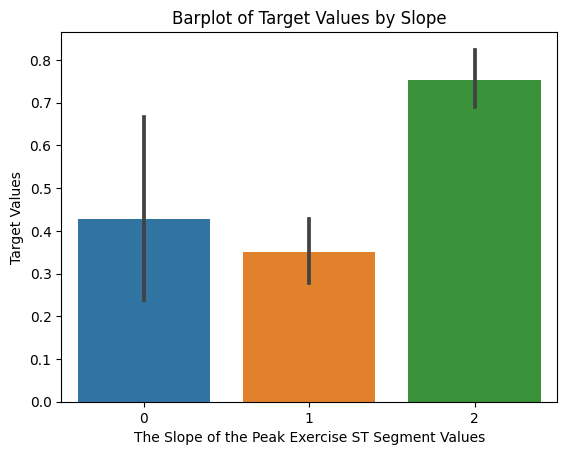

In [28]:
sns.barplot(data=dataset, x="slope",y="target")
plt.xlabel("The Slope of the Peak Exercise ST Segment Values")
plt.ylabel("Target Values")
plt.title("Barplot of Target Values by Slope")
plt.show()

***Analysing the 'ca' feature***

In [29]:
#number of major vessels (0-3) colored by flourosopy -ca

In [30]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

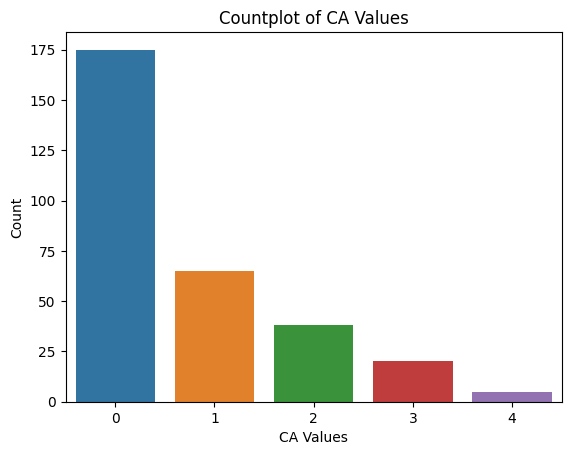

In [31]:
sns.countplot(data=dataset, x="ca")
plt.xlabel("CA Values")
plt.ylabel("Count")
plt.title("Countplot of CA Values")
plt.show()

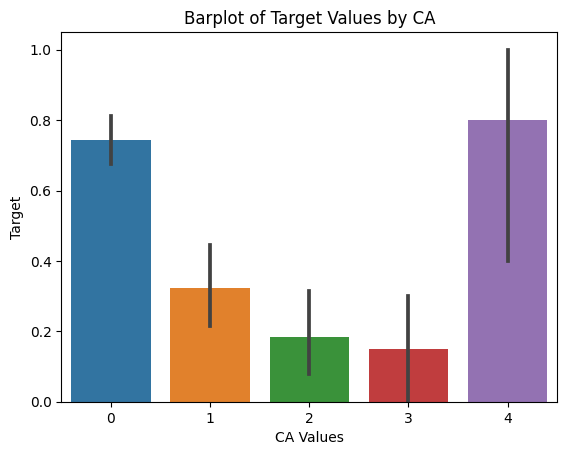

In [32]:
sns.barplot(data=dataset,x="ca",y="target")
plt.xlabel("CA Values")
plt.ylabel("Target")
plt.title("Barplot of Target Values by CA")
plt.show()

***Analysing the 'thal' feature***

In [33]:
dataset["thal"].unique()

array([1, 2, 3, 0])

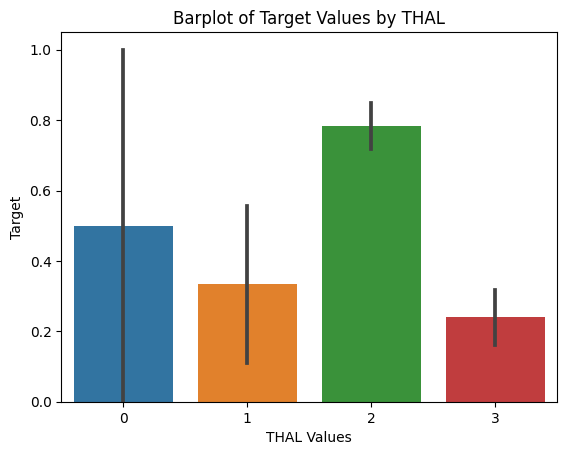

In [34]:
sns.barplot(data=dataset,x="thal",y="target")
plt.xlabel("THAL Values")
plt.ylabel("Target")
plt.title("Barplot of Target Values by THAL")
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

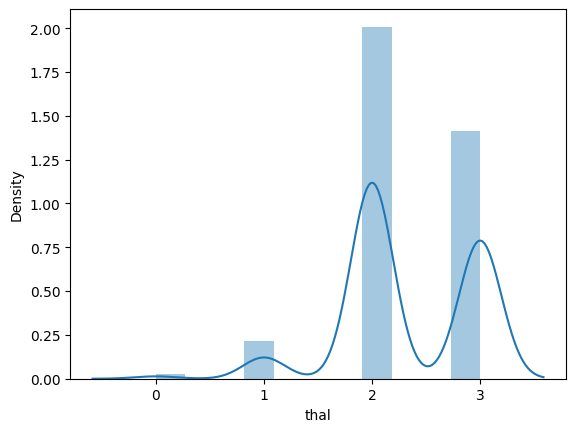

In [35]:
sns.distplot(dataset["thal"])

**IV. Train Test split**

In [36]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [37]:
X_train.shape

(242, 13)

In [38]:
X_test.shape

(61, 13)

In [39]:
Y_train.shape

(242,)

In [40]:
Y_test.shape

(61,)

**V. Model Fitting**

In [41]:
from sklearn.metrics import accuracy_score

**1.Logistic Regression**


In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [43]:
Y_pred_lr.shape

(61,)

In [44]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


**2.Naive Bayes**

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [46]:
Y_pred_nb.shape

(61,)

In [47]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


**3.SVM**

In [48]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [49]:
Y_pred_svm.shape

(61,)

In [50]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


**4.K Nearest Neighbors**

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [52]:
Y_pred_knn.shape

(61,)

In [53]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


**5.Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [55]:
print(Y_pred_dt.shape)

(61,)


In [56]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


**6.Random Forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [58]:
Y_pred_rf.shape

(61,)

In [59]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


**7.XGBoost**

In [60]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [61]:
Y_pred_xgb.shape

(61,)

In [62]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


**8.Neural Network**

In [63]:
from keras.models import Sequential
from keras.layers import Dense

In [64]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 28.1631 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 19.7204 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 11.3771 - accuracy: 0.4628
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 3.6207 - accuracy: 0.5248
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 2.7976 - accuracy: 0.5785
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 2.4309 - accuracy: 0.5785
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 1.6816 - accuracy: 0.5744
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 1.7405 - accuracy: 0.5289
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4497 - accuracy: 0.5992
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4372 - accuracy: 0.5868
Epoch 11/300
8/8 [========

In [66]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [67]:
Y_pred_nn.shape

(61, 1)

In [68]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [69]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 81.97 %


**VI. Output final score**

In [70]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 81.97 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

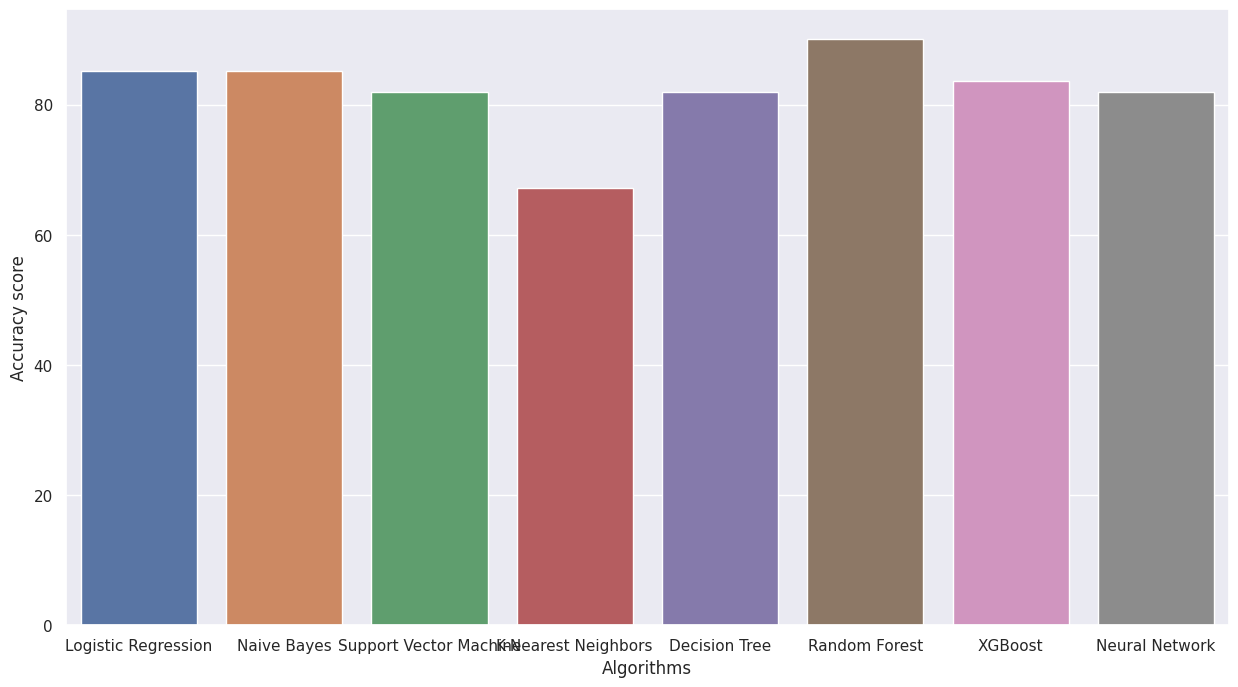

In [72]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)